# Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats

# Functions and constants

In [2]:
def get_r2(x,y):
    polyfit = np.polyfit(x,y,1)
    y_predicted = np.polyval(polyfit,x)
    residuals = y-y_predicted
    return 1-np.sum(residuals**2)/np.sum((y-np.mean(y))**2)

def get_percentiles(x):
    y_percentiles = np.arange(101)
    x_percentiles = np.percentile(x,y_percentiles)
    return x_percentiles,y_percentiles

def get_realpdf(x,y,nbins):
    polyfit = np.polyfit(x,y,1)
    y_predicted = np.polyval(polyfit,x)
    residuals = y-y_predicted    
    bins    = np.linspace(-np.max(np.abs(residuals)),np.max(np.abs(residuals)),nbins)
    binmids = bins[1:] - np.diff(bins)/2
    bindensity,_ = np.histogram(residuals,bins=bins,density=True)
    return bindensity,binmids,bins

def get_normalpdf(x,y,binmids):
    polyfit = np.polyfit(x,y,1)
    y_predicted = np.polyval(polyfit,x)
    residuals = y-y_predicted
    mean = np.mean(residuals)
    std = np.std(residuals)
    return stats.norm.pdf(binmids,mean,std)

def get_powerlaw_constants(x,y):
    polyfit = np.polyfit(np.log10(x),np.log10(y),1)
    l,n = 10**polyfit[1],polyfit[0]
    return l,n

# Read data

In [3]:
data = pd.read_csv('mars-barchans-cropped.csv')

In [4]:
lon = data['lon']
lat = data['lat']
h   = data['dune_length']
v   = data['dune_volume']

# Analysis

In [5]:
h_percentiles,y_percentiles = get_percentiles(h)

In [6]:
get_r2(h,v**(1/3))

0.769271462105656

In [7]:
l_fit,n_fit = get_powerlaw_constants(h,v)

In [8]:
nbins = 200

vthird_residuals_realpdf,vthird_residuals_binmids,vthird_residuals_bins = get_realpdf(h,v**(1/3),nbins)
vthird_residuals_normalpdf = get_normalpdf(h,v**(1/3),vthird_residuals_binmids)

In [9]:
nbins = 100

log10v_residuals_realpdf,log10v_residuals_binmids,log10v_residuals_bins = get_realpdf(np.log10(h),np.log10(v),nbins)
log10v_residuals_normalpdf = get_normalpdf(np.log10(h),np.log10(v),log10v_residuals_binmids)

# Plots

Text(0, 0.5, 'latitude ($\\degree$)')

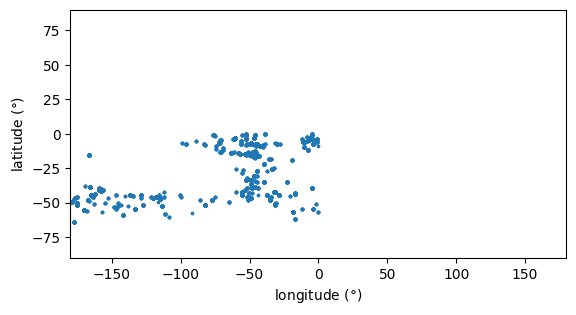

In [10]:
ss = 3
plt.scatter(lon,lat,s=ss)
plt.axis('square')
plt.xlim(-180,180) # this is -180 to 180 becasue it's longitude and all data is in this limit by definition
plt.ylim(-90,90)
plt.xlabel('longitude ($\\degree$)')
plt.ylabel('latitude ($\\degree$)')

In [11]:
np.polyfit(h**3,v,deg=1)

array([2.79297671e-02, 2.92538603e+05])

(44.72135955, 1402.542334)

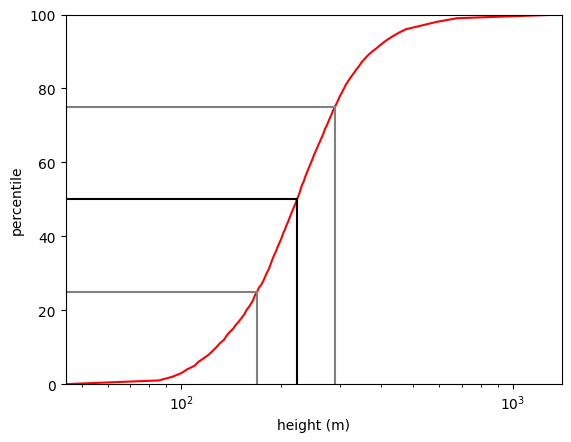

In [12]:
plt.plot(h_percentiles,y_percentiles,c='r')
plt.plot([h_percentiles[0],h_percentiles[25]],[25,25],c='grey')
plt.plot([h_percentiles[0],h_percentiles[50]],[50,50],c='k')
plt.plot([h_percentiles[0],h_percentiles[75]],[75,75],c='grey')
plt.plot([h_percentiles[25],h_percentiles[25]],[0,25],c='grey')
plt.plot([h_percentiles[50],h_percentiles[50]],[0,50],c='k')
plt.plot([h_percentiles[75],h_percentiles[75]],[0,75],c='grey')
plt.xscale('log')
plt.xlabel('height (m)')
plt.ylabel('percentile')
plt.ylim(0,100)
plt.xlim(np.min(h),np.max(h))

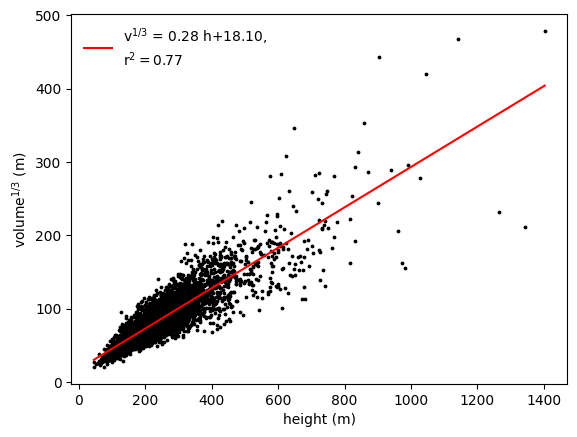

In [13]:
ss = 3

plt.scatter(h,v**(1/3),c='k',s=ss)

h_vs_vthird_polyfit = np.polyfit(h,v**(1/3),1)
tempx = np.linspace(np.min(h),np.max(h))
plt.plot(tempx,np.polyval(h_vs_vthird_polyfit,tempx),'r',label='v$^{1/3}$ = %.2f h+%.2f,\nr$^2=%.2f$'%(h_vs_vthird_polyfit[0],h_vs_vthird_polyfit[1],get_r2(h,v**(1/3))))

plt.xlabel('height (m)')
plt.ylabel('volume$^{1/3}$ (m)')
plt.legend(frameon=False)

Text(0, 0.5, 'PDF')

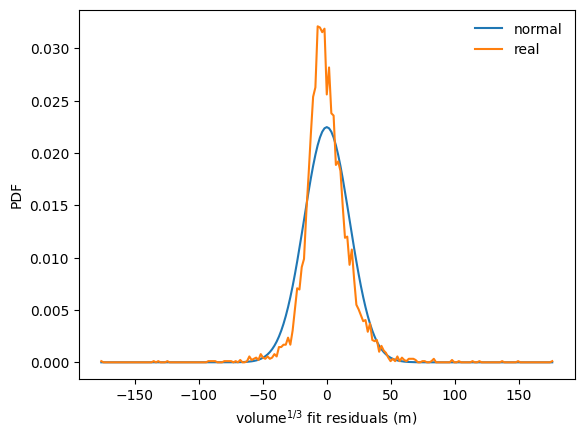

In [14]:
plt.plot(vthird_residuals_binmids, vthird_residuals_normalpdf,label='normal')
plt.plot(vthird_residuals_binmids,vthird_residuals_realpdf,label='real')
plt.legend(frameon=False)
plt.xlabel('volume$^{1/3}$ fit residuals (m)')
plt.ylabel('PDF')

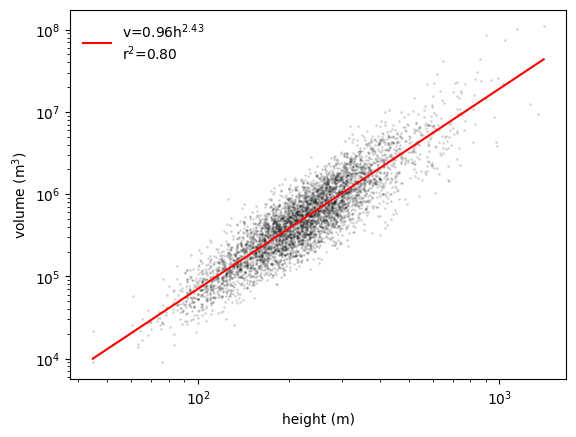

In [15]:
ss = 3
plt.scatter(h,v,c='k',s=ss,alpha=0.2,lw=0)
tempx = np.logspace(np.log10(np.min(h)),np.log10(np.max(h)))
plt.plot(tempx,l_fit*tempx**n_fit,'r',label='v=%.2fh$^{%.2f}$\nr$^2$=%.2f'%(l_fit,n_fit,get_r2(np.log10(h),np.log10(v))))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('height (m)')
plt.ylabel('volume (m$^3$)')
plt.legend(frameon=False)

Text(0, 0.5, 'PDF')

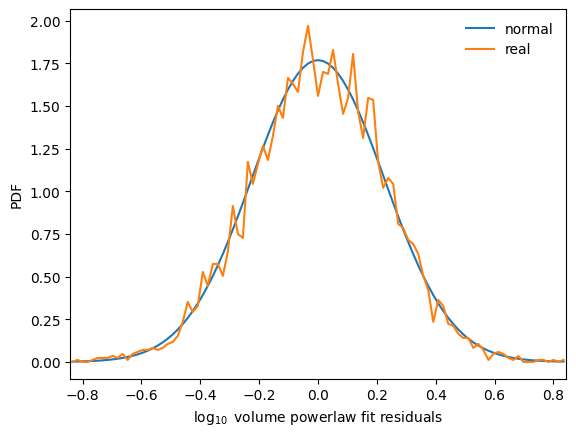

In [16]:
plt.plot(log10v_residuals_binmids,log10v_residuals_normalpdf,label='normal')
plt.plot(log10v_residuals_binmids,log10v_residuals_realpdf,label='real')
plt.xlim(log10v_residuals_bins[0],log10v_residuals_bins[-1])
plt.legend(frameon=False)
plt.xlabel('$\\log_{10}$ volume powerlaw fit residuals')
plt.ylabel('PDF')